In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def read_from_csv(csvfile):
    """ Read from csv file and convert all values in scientific format to integer"""
    df = pd.read_csv(csvfile,header=None,names=['feature1','feature2','feature3','feature4','feature5','feature6','outcome'])
    return df



# Read the data and show statistics
#  450 on all fields (no missing values).

In [2]:
csvFile = 'ES_DS_test_section1.csv'
df = read_from_csv(csvFile)
df = df.astype({'outcome':int})

In [3]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,outcome
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.494889,-6.068999,6.044578,6.399889,0.007170,-0.004314,0.100000
std,0.285766,8.585543,0.313952,1.417792,0.097730,0.101296,0.300334
min,5.000000,-20.800000,5.500000,4.000000,-0.271000,-0.281000,0.000000
25%,5.240000,-13.400000,5.762500,5.162500,-0.061725,-0.078950,0.000000
50%,5.490000,-6.785000,6.040000,6.440000,0.008770,-0.002635,0.000000
75%,5.730000,1.247500,6.310000,7.510000,0.070575,0.069850,0.000000
max,6.000000,8.950000,6.600000,8.980000,0.289000,0.244000,1.000000


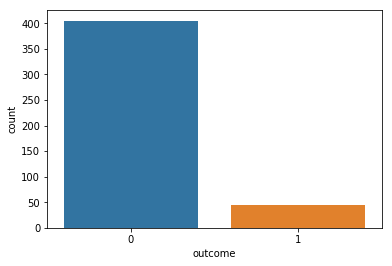

In [4]:
# Check result skewdness
sns.countplot(df['outcome'],label="Outcome")
plt.show()

# Show histogram of features and outcome

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000124C7DD7C50>,
      dtype=object)

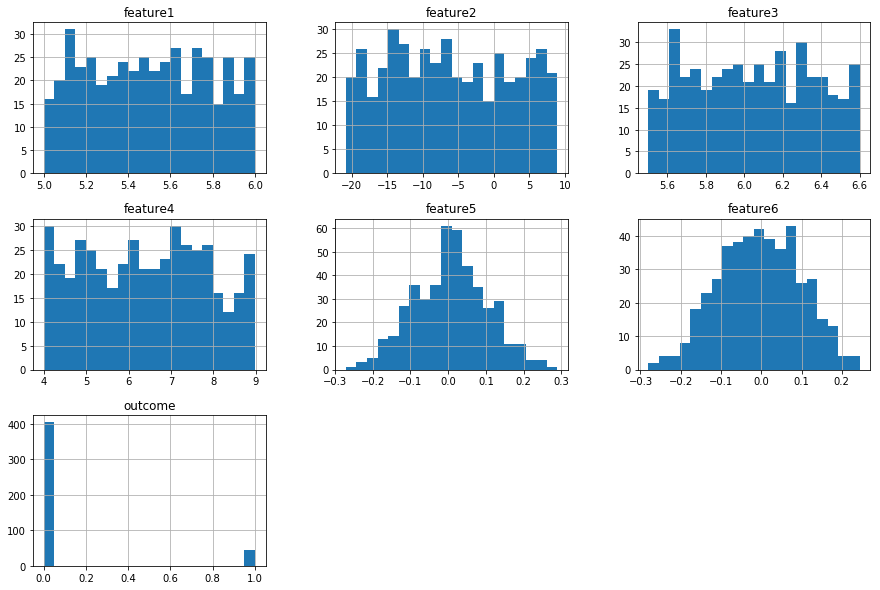

In [5]:
df.hist(bins=20,figsize=(15,10))

## Heatmap of correlation between the features and the outcome.
### Features #1,#3 are highly correlated

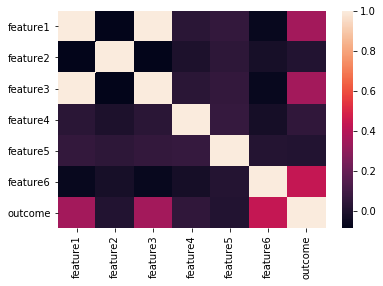

In [6]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [7]:
def create_test_train_from_dataframe(df,result_column):
    y = df[result_column]
    X = df.drop([result_column],axis=1)
    
    # Using 2/3 of data for train, 1/3 for test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.33)
    return X_train, X_test, y_train, y_test

def fit_logistic(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    prediction = logreg.predict(X_test)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
    return prediction

# Tested decision tree, results were inferior to LogisticRegression
def fit_decision_tree(X_train, y_train, X_test, y_test):
    dtc = DecisionTreeClassifier(class_weight='balanced')
    dtc.fit(X_train, y_train)
    prediction = dtc.predict(X_test)
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))
    return prediction


In [8]:
def fit_and_predict(df,result_column):
    X_train, X_test, y_train, y_test = create_test_train_from_dataframe(df,result_column)

    # Normalizing all features to scale (mean=0, std=1) helps improve results
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    prediction = fit_logistic(X_train,y_train, X_test,y_test)
    return X_train, X_test, y_train, y_test, prediction

def print_results(y_test, prediction):
    print("Confustion Matrix:")
    print(confusion_matrix(y_test, prediction))
    print("Precision score  :",precision_score(y_test,prediction))
    print("Recall score     :",recall_score(y_test,prediction))
    print("F1 score:")
    print(f1_score(y_test, prediction, average='macro'))


# Run a basic logistic regression for prediction

In [9]:
X_train, X_test, y_train, y_test, prediction = fit_and_predict(df,'outcome')
print_results(y_test, prediction)


Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.99
Confustion Matrix:
[[135   0]
 [  1  13]]
Precision score  : 1.0
Recall score     : 0.9285714285714286
F1 score:
0.979636463031297


# Run the same without feature3

In [10]:
X_train, X_test, y_train, y_test, prediction = fit_and_predict(df.drop('feature3',axis=1),'outcome')
print_results(y_test, prediction)

Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.99
Confustion Matrix:
[[135   0]
 [  2  12]]
Precision score  : 1.0
Recall score     : 0.8571428571428571
F1 score:
0.9578619909502262


## Sanity check - see the results with our own eyes

In [11]:
df_results = pd.DataFrame()
df_results['Original'] = y_test
df_results['Prediction'] = prediction

df_results.head(50)

,Original,Prediction
124,0,0
54,0,0
268,0,0
293,0,0
230,0,0
134,0,0
12,0,0
423,0,0
272,0,0
76,0,0
